In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

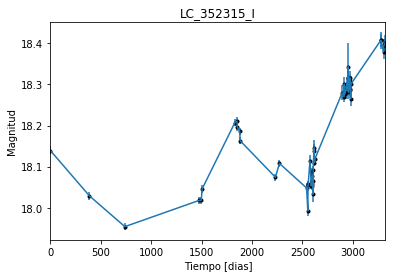

In [2]:
data = np.genfromtxt('LC_352315_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_352315_I')
plt.savefig("LC_352315_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

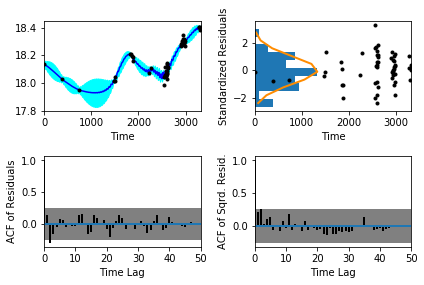

In [5]:
sample.assess_fit()

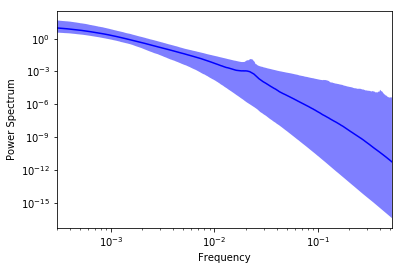

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

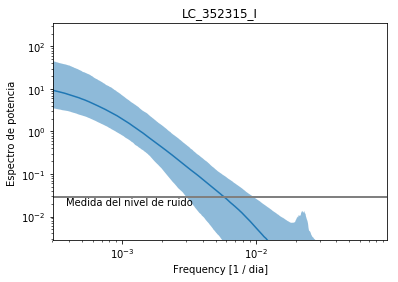

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_352315_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_352315_I')

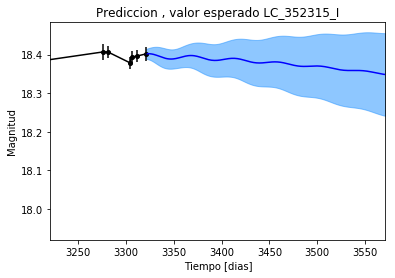

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_352315_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_352315_I')

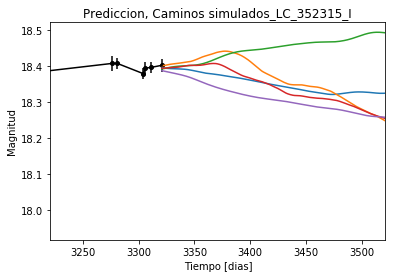

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_352315_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


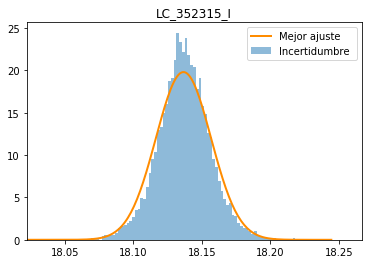

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_352315_I')
plt.savefig("Mejor_ajuste_LC_352315_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_352315_I')

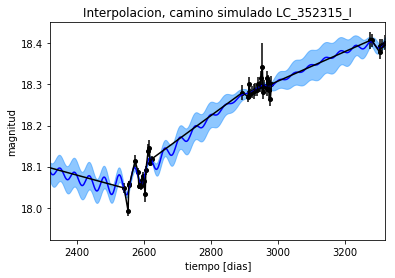

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_352315_I')

Text(0.5,1,'Interpolacion, camino simulado LC_352315_I')

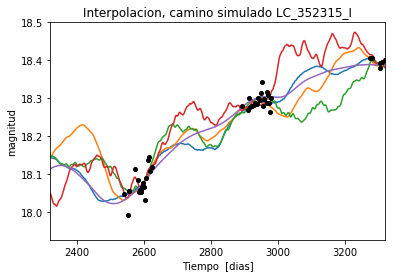

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_352315_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 480.010620493
Median: 0.0162217203356
Standard deviation: 0.210907483532
68% credibility interval: [ 0.00072874  0.22316926]
95% credibility interval: [  3.59693523e-04   8.29400697e-01]
99% credibility interval: [  3.13015569e-04   1.00202596e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 383.38207882
Median: 0.00239977943397
Standard deviation: 0.0754225669994
68% credibility interval: [ 0.0004718   0.03774896]
95% credibility interval: [ 0.00032555  0.22700712]
99% credibility interval: [  3.06164714e-04   5.35619011e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 404.402582168
Median: 0.0261961294651
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 290.461094992
Median: 144.270284897
Standard deviation: 2.26905325533
68% credibility interval: [ 142.16522316  146.43292633]
95% credibility interval: [ 139.66714676  148.88730931]
99% credibility interval: [ 137.68846224  149.95967449]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 289.851538249
Median: 0.668967821011
Standard deviation: 2.26338317368
68% credibility interval: [ 0.03319743  4.06680805]
95% credibility interval: [ 0.01242649  7.55026776]
99% credibility interval: [  9.78283213e-03   1.02139775e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 753.702348303
Median: 0.772784978711
Standard deviation: 8.75394242143
68% credibility interval: [ 0.02191929  9.33951812]
95% credibility interval: [  7.2

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20039.8020083
Median: 1.88169169405e-38
Standard deviation: 4.60923229705e+22
68% credibility interval: [  5.98274446e-116   8.05061344e-016]
95% credibility interval: [  6.59704020e-174   4.04786783e+001]
99% credibility interval: [  3.09789886e-175   1.44666039e+002]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1454.98838047
Median: 18.1391871792
Standard deviation: 0.0725594246842
68% credibility interval: [ 18.07627072  18.20471125]
95% credibility interval: [ 18.00381771  18.28135492]
99% credibility interval: [ 17.93619086  18.38453568]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1016.83992732
Median: 0.0232689108311
Standard deviation: 0.246511261528
68% credibility interval: [ 0.          0.39179511]
95% credibility interval: [ 0.          0.87949042]
99% credibility interval: [ 0.          1.01786286]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1016.83992732
Median: 0.0232689108311
Standard deviation: 0.246511261528
68% credibility interval: [ 0.          0.39179511]
95% credibility interval: [ 0.          0.87949042]
99% credibility interval: [ 0.          1.01786286]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 939.472633311
Median: 0.0
Standard deviation: 0.00018346558689
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 290.461094992
Median: 144.270284897
Standard deviation: 2.26905325533
68% credibility interval: [ 142.16522316  146.43292633]
95% credibility interval: [ 139.66714676  148.88730931]
99% credibility interval: [ 137.68846224  149.95967449]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1400.43995246
Median: 0.0176093551105
Standard deviation: 0.0215471159565
68% credibility interval: [ 0.01103336  0.03325999]
95% credibility interval: [ 0.00772939  0.06780181]
99% credibility interval: [ 0.00636861  0.13150496]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 540.61114601
Median: 1.31635831744
Standard deviation: 0.253377308623
68% credibility interval: [ 1.06599145  1.59313744]
95% credibility interval: [ 0.89186437  1.85446743]
99% credibility interval: [ 0.78986034  1.95463743]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 175.783925397
Median: 0.00027229209974
Standard deviation: 0.100483375527
68% credibility interval: [  2.76742904e-06   1.42478199e-02]
95% credibility interval: [  5.74900768e-07   1.94963476e-01]
99% credibility interval: [  4.07495138e-08   7.32419302e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 480.010620493
Median: (-0.10192407487-2.51654973078j)
Standard deviation: 2.03840484701
68% credibility interval: [-1.40221383+0.j         -0.00457882-0.14121842j]
95% credibility interval: [ -5.21127827e+00+0.j          -2.26002106e-03-0.12613838j]
99% credibility interval: [ -6.29591479e+00+0.j          -1.96673482e-03-0.14775317j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 383.38207882
Median: (-0.01507825888+0j)
Standard deviation: 1.61975064639
68% credibility interval: [-0.23718371+2.14993958j -0.00296443+2.5861612j ]
95% credibility interval: [-1.42632781+2.09914938j -0.00204546+0.11807615j]
99% credibility interval: [ -3.36539350e+00+3.44808187j  -1.92368963e-03+0.j        ]
Posterior summary for parameter